# Dados Abertos: Análise das Despesas Parlamentares

Análise das despesas pela cota para exercício da atividade parlamentar, com foco nos gastos de divulgação da atividade parlamentar.

## Consulta ao data lake da Base dos Dados

In [1]:
import basedosdados as bd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
query_despesa = """
SELECT id_legislatura, categoria_despesa, ROUND(SUM(valor_liquido),1) AS despesa_total
FROM `basedosdados.br_camara_dados_abertos.despesa` desp
WHERE id_legislatura IN ('53', '54', '55', '56', '57')
GROUP BY id_legislatura, categoria_despesa
ORDER BY id_legislatura ASC;
"""
df = bd.read_sql(query_despesa, billing_project_id = 'cursopython-396323')

Downloading: 100%|███████████████████████████| 91/91 [00:00<00:00, 272.43rows/s]


In [ ]:
# Dá para salvar o dataframe localmente, em csv
# df.to_csv('despesa_camara.csv', sep=';', encoding='utf-8', index=False)

In [ ]:
# E abrir depois dessa forma, para economizar a cota de processamento no Google Cloud
# df = pd.read_csv('despesa_camara.csv', sep=';', encoding='utf-8')

In [4]:
df.head()

,id_legislatura,categoria_despesa,despesa_total
0,53,SERVIÇOS POSTAIS,12700785.9
1,53,PASSAGEM AÉREA - REEMBOLSO,14739989.6
2,53,AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.,546967.0
3,53,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",27402720.6
4,53,SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...,2011735.6


In [8]:
# Vamos transformar a tabela do formato "long" para o formato "wide" para produzir as visualizações
df_wide = pd.pivot(df, index='id_legislatura', columns='categoria_despesa', values='despesa_total')

In [9]:
df_wide.head()

categoria_despesa,AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.,AQUISIÇÃO DE TOKENS E CERTIFICADOS DIGITAIS,AQUISIÇÃO OU LOC. DE SOFTWARE; SERV. POSTAIS; ASS.,ASSINATURA DE PUBLICAÇÕES,COMBUSTÍVEIS E LUBRIFICANTES.,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.",LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES,...,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR,"PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR",PASSAGEM AÉREA - REEMBOLSO,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - SIGEPA,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",SERVIÇOS POSTAIS,TELEFONIA
id_legislatura,,,,,,,,,,,,,,,,,,,,,
53,546967.0,NaN,951284.9,323692.6,31673849.4,27402720.6,45479215.2,2381273.6,2943778.7,31103414.5,...,28329138.7,NaN,14739989.6,29193738.6,NaN,NaN,2011735.6,NaN,12700785.9,46260499.5
54,NaN,NaN,NaN,813847.3,63940898.2,64670588.0,147886173.1,6685043.1,7401873.8,63637325.0,...,70999787.3,NaN,15296795.3,153698023.3,NaN,77865.3,5041291.8,683842.8,21189101.8,70473361.0
55,NaN,NaN,NaN,1278575.4,72394570.9,86257568.4,211598144.0,6043583.9,7986580.3,NaN,...,93954325.7,442509.9,10204488.9,203790094.4,NaN,400573.5,6175632.8,3614294.8,14316958.3,34792698.9
56,NaN,203.0,NaN,797967.1,60448111.8,88233393.2,218374993.2,3119730.1,6958945.5,NaN,...,97920460.1,144359.2,8807720.5,86813154.9,99383704.0,303423.5,3826785.1,3051431.6,5810774.7,16526091.6
57,NaN,4623.4,NaN,93203.7,18353845.3,NaN,76366254.6,1247175.4,2555279.9,NaN,...,26205524.4,47951.6,1179996.6,1755763.6,39385663.9,110503.9,1264070.6,925570.9,1.0,2479573.4


In [10]:
# Incluindo uma coluna com a somatória de todas as categorias de despesa
df_wide['total'] = df_wide.iloc[:, 2:21].sum(axis=1)

In [16]:
# Calculando os valores percentuais
df_plot = df_wide.div(df_wide.sum(axis=1), axis=0) * 100

# Adicionando uma coluna para o total de 100%
df_plot['total'] = df_plot.sum(axis=1)

In [17]:
df_plot.head()

categoria_despesa,AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.,AQUISIÇÃO DE TOKENS E CERTIFICADOS DIGITAIS,AQUISIÇÃO OU LOC. DE SOFTWARE; SERV. POSTAIS; ASS.,ASSINATURA DE PUBLICAÇÕES,COMBUSTÍVEIS E LUBRIFICANTES.,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.",LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES,...,"PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR",PASSAGEM AÉREA - REEMBOLSO,PASSAGEM AÉREA - RPA,PASSAGEM AÉREA - SIGEPA,"PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS",SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",SERVIÇOS POSTAIS,TELEFONIA,total
id_legislatura,,,,,,,,,,,,,,,,,,,,,
53,0.108644,NaN,0.188954,0.064295,6.291391,5.443015,9.033557,0.472993,0.584724,6.178085,...,NaN,2.927811,5.798766,NaN,NaN,0.399592,NaN,2.522763e+00,9.188744,100.0
54,NaN,NaN,NaN,0.060507,4.753789,4.808039,10.994837,0.497010,0.550304,4.731220,...,NaN,1.137265,11.426928,NaN,0.005789,0.374803,0.050841,1.575338e+00,5.239456,100.0
55,NaN,NaN,NaN,0.075673,4.284679,5.105162,12.523455,0.357690,0.472686,NaN,...,0.026190,0.603954,12.061335,NaN,0.023708,0.365505,0.213912,8.473505e-01,2.059209,100.0
56,NaN,0.000013,NaN,0.049663,3.762107,5.491379,13.590997,0.194163,0.433104,NaN,...,0.008984,0.548166,5.402987,6.185340,0.018884,0.238167,0.189912,3.616450e-01,1.028534,100.0
57,NaN,0.001121,NaN,0.022601,4.450533,NaN,18.517674,0.302421,0.619617,NaN,...,0.011628,0.286132,0.425746,9.550434,0.026796,0.306518,0.224437,2.424850e-07,0.601259,100.0


## Visualização dos dados

Vamos explorar o que temos até agora.
O valor absoluto da despesa total é em reais; o valor relativo é em percentual.

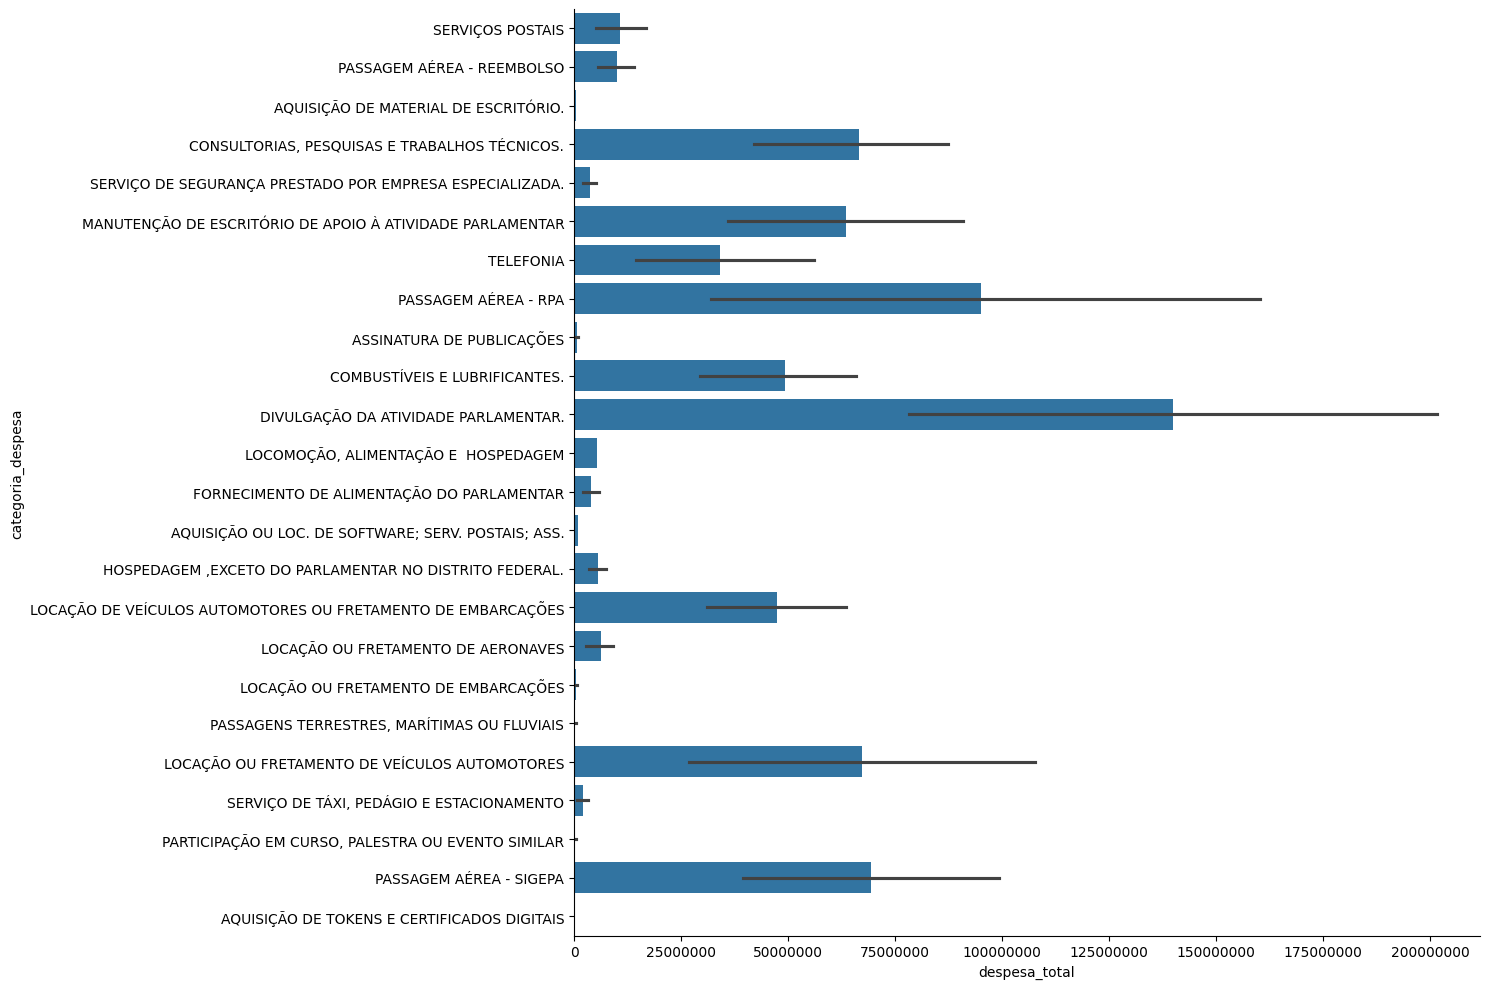

In [11]:
# Gráfico de barras com todas as categorias de despesa para todo o período
sns.catplot(data = df, x = 'despesa_total', y = 'categoria_despesa', kind = 'bar', height=10, aspect=1.5)
plt.ticklabel_format(style='plain', axis='x')

### Gráfico com o valor absoluto

Foco na divulgação da atividade parlamentar

In [22]:
# Ordenando os dados em ordem crescente pelo valor total
df_wide_sorted = df_wide.sort_values(by="id_legislatura")

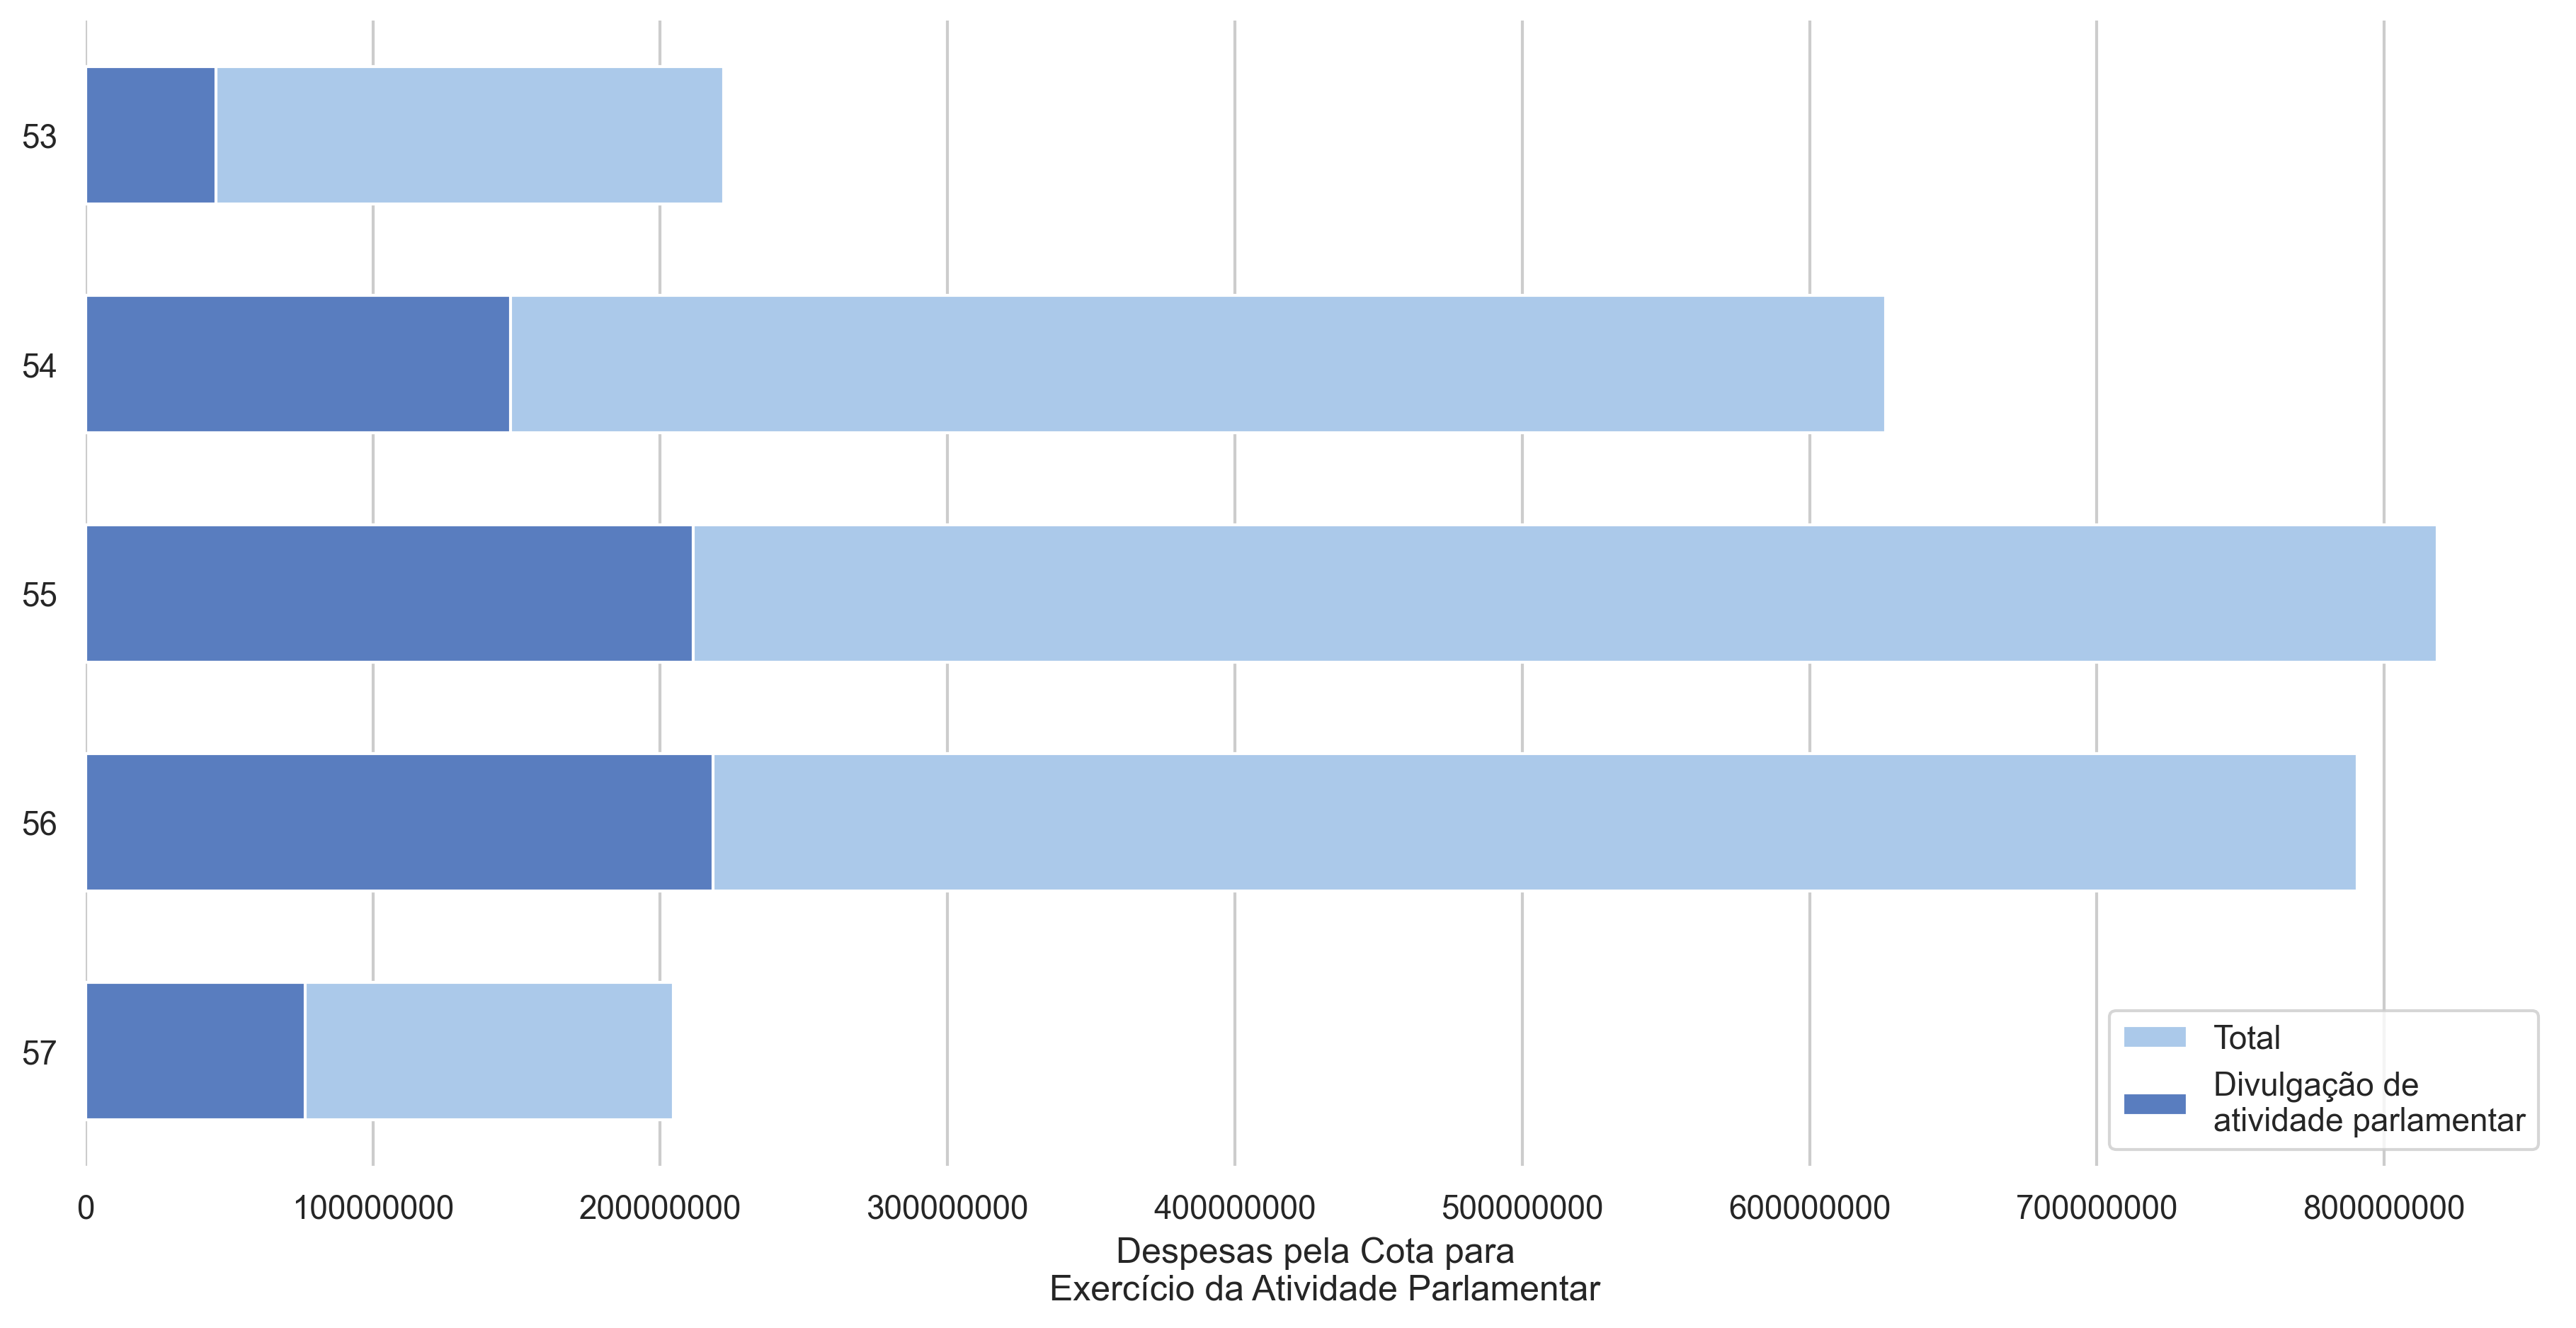

In [23]:
# Configurando o tema
sns.set_theme(style="whitegrid")

# Inicializando a figura do matplotlib
f, ax = plt.subplots(figsize=(15, 7), dpi=300)  # Ajuste o tamanho conforme necessário

# Plotando o total das despesas
sns.set_color_codes("pastel")
sns.barplot(y="id_legislatura", x="total", data=df_wide_sorted, width=0.6,
            label="Total", color="b", orient='h')

# Plotando as despesas de divulgação da atividade parlamentar
sns.set_color_codes("muted")
sns.barplot(y="id_legislatura", x="DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.", data=df_wide_sorted, width=0.6,
            label="Divulgação de \natividade parlamentar", color="b", orient='h')

# Adicionando a legenda e rótulos informativos aos eixos
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlabel="Despesas pela Cota para \n Exercício da Atividade Parlamentar",
       ylabel="")
sns.despine(left=True, bottom=True)
plt.ticklabel_format(style='plain', axis='x')

# Salvando o gráfico
plt.savefig("divulgacao_total.svg", format='svg')
# Mostrando o gráfico
plt.show()

### Gráfico com valores percentuais

Foco na divulgação da atividade parlamentar

In [20]:
# Ordenando os dados em ordem crescente pelo valor total
df_plot_sorted = df_plot.sort_values(by="id_legislatura")

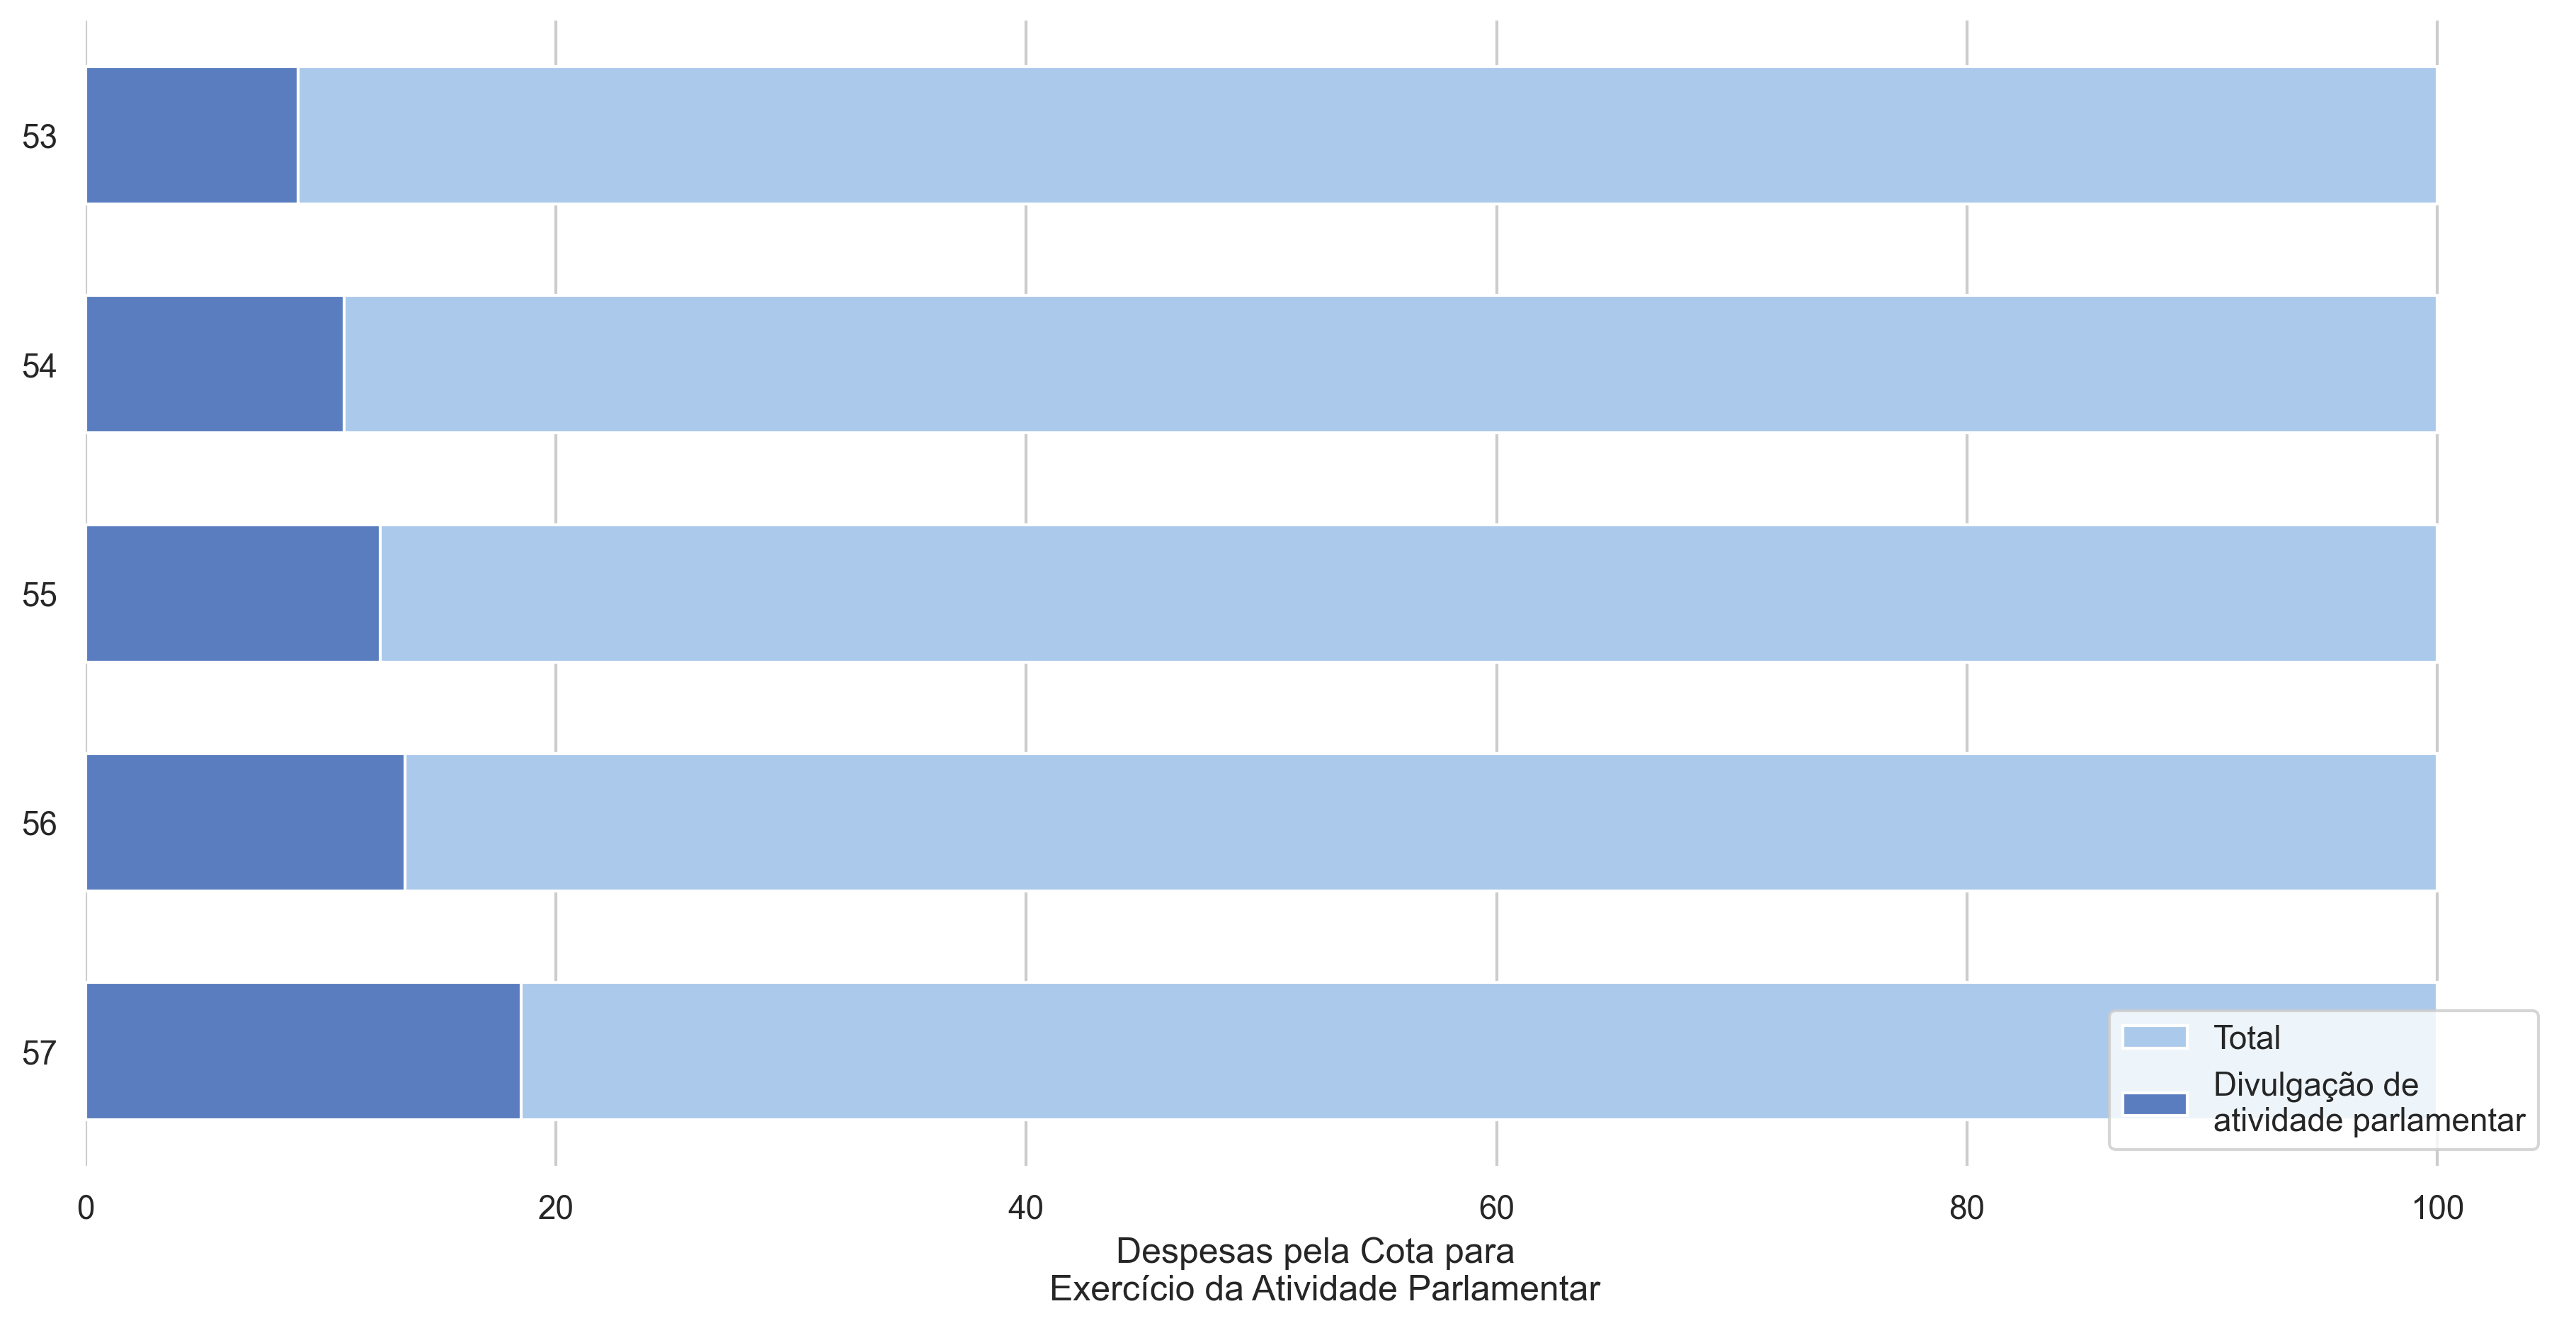

In [21]:
# Configurando o tema
sns.set_theme(style="whitegrid")

# Inicializando a figura do matplotlib
f, ax = plt.subplots(figsize=(15, 7), dpi=300)  # Ajuste o tamanho conforme necessário

# Plotando o total das despesas
sns.set_color_codes("pastel")
sns.barplot(y="id_legislatura", x="total", data=df_plot_sorted, width=0.6,
            label="Total", color="b", orient='h')

# Plotando as despesas de divulgação da atividade parlamentar
sns.set_color_codes("muted")
sns.barplot(y="id_legislatura", x="DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.", data=df_plot_sorted, width=0.6,
            label="Divulgação de \natividade parlamentar", color="b", orient='h')

# Adicionando a legenda e rótulos informativos aos eixos
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlabel="Despesas pela Cota para \n Exercício da Atividade Parlamentar",
       ylabel="")
sns.despine(left=True, bottom=True)

# Salvando o gráfico
plt.savefig("divulgacao_perc.svg", format='svg')
# Mostrando o gráfico
plt.show()